## Geração de dados para distribuição Weibull

A **Distribuição de Weibull** é uma distribuição estatística usada para modelar o tempo de vida de sistemas e processos, sendo muito utilizada em confiabilidade, análise de falhas e previsão de tempos até eventos (como tempo até a falha de um equipamento ou duração de um fenômeno natural).  

#### **Parâmetros da Distribuição de Weibull**  
Ela é definida por dois principais parâmetros:  

1. **Parâmetro de forma ($\beta$)** – Controla a "forma" da distribuição e indica o comportamento da taxa de falha:  
   - Se $\beta < 1$: a taxa de falha **diminui** com o tempo (exemplo: eletrônicos que sofrem mortalidade infantil).  
   - Se $\beta = 1$: a taxa de falha é **constante**, tornando a Weibull equivalente a uma distribuição exponencial (exemplo: componentes eletrônicos estáveis).  
   - Se $\beta > 1$: a taxa de falha **aumenta** com o tempo, indicando desgaste (exemplo: peças mecânicas que sofrem degradação).  

2. **Parâmetro de escala ($\eta$)** – Representa um valor de referência para o tempo médio de vida. Quando o tempo $t = \eta$, 63,2% das unidades já falharam.  

A função densidade de probabilidade (PDF) da Weibull é:  

$
f(t) = \frac{\beta}{\eta} \left(\frac{t}{\eta}\right)^{\beta - 1} e^{-\left(\frac{t}{\eta}\right)^\beta}
$

Estatística KS: 0.011328643332788157, p-valor: 0.5386194707086644


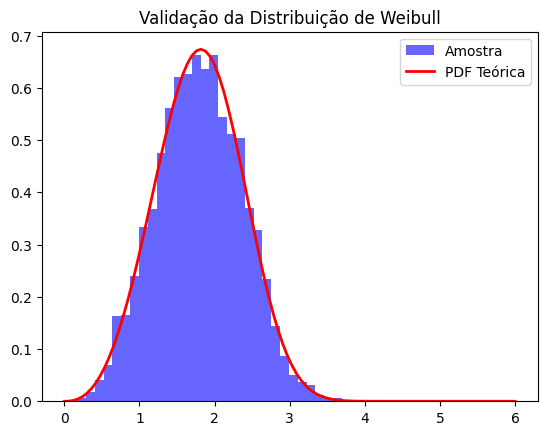

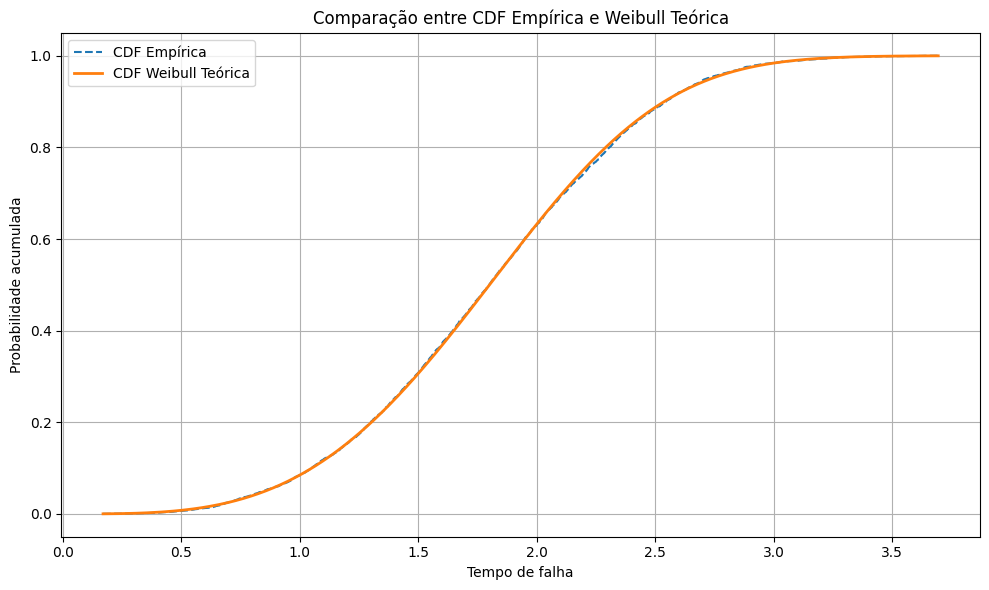

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, kstest

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, kstest

# Parâmetro
k = 3.5
lambda_ = 2500

# Gerar dados
dados = weibull_min.rvs(k, scale=lambda_, size=5_000)
np.savetxt(f"dados_brutos_brocas.csv", dados, delimiter=",")

# Teste de aderência - Kolmogorov-Smirnov
D, p_value = kstest(dados, 'weibull_min', args=(k, 0, lambda_))
print(f"Estatística KS: {D}, p-valor: {p_value}")

# Se o p-valor for maior que 0.05, podemos aceitar que os dados seguem a distribuição de Weibull

# Visualização do histograma e PDF teórica
x = np.linspace(0, 6, 100)
plt.hist(dados, bins=30, density=True, alpha=0.6, color='b', label="Amostra")
plt.plot(x, weibull_min.pdf(x, k, scale=lambda_), 'r-', lw=2, label="PDF Teórica")
plt.legend()
plt.title("Validação da Distribuição de Weibull")
plt.show()

# Plot da CDF empírica vs teórica
dados_ordenados = np.sort(dados)
cdf_empirica = np.arange(1, len(dados)+1) / len(dados)
cdf_teorica = weibull_min.cdf(dados_ordenados, c=k, scale=lambda_)

plt.figure(figsize=(10, 6))
plt.plot(dados_ordenados, cdf_empirica, label='CDF Empírica', linestyle='--')
plt.plot(dados_ordenados, cdf_teorica, label='CDF Weibull Teórica', linewidth=2)
plt.title('Comparação entre CDF Empírica e Weibull Teórica')
plt.xlabel('Tempo de falha')
plt.ylabel('Probabilidade acumulada')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### **Comparar diferentes valores de k**

mantendo um valor lambda fixo

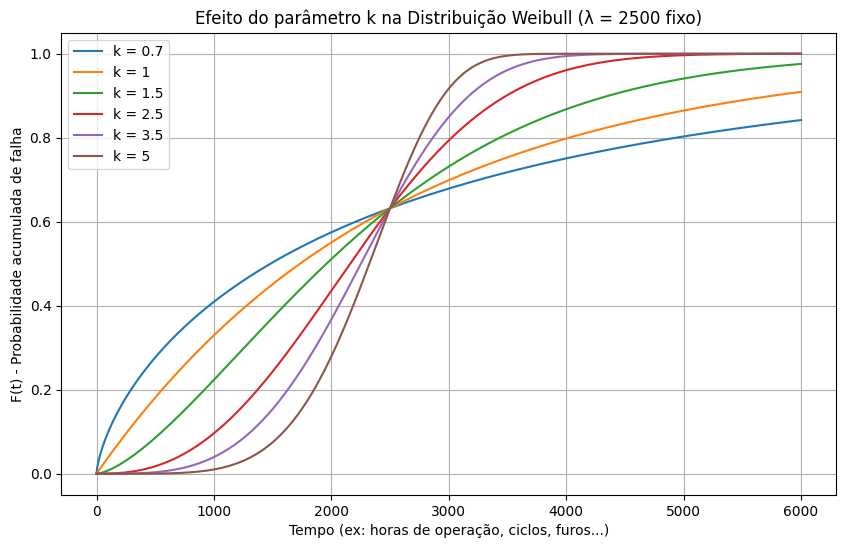

In [27]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Parâmetros
lambd = 2500  # Escala fixa
ks = [0.7, 1, 1.5, 2.5, 3.5, 5]  # Diferentes formas (k)

# Intervalo de tempo para o gráfico
t = np.linspace(0, 6000, 1000)

# Plotando as curvas CDF
plt.figure(figsize=(10, 6))
for k in ks:
    cdf = weibull_min.cdf(t, c=k, scale=lambd)
    plt.plot(t, cdf, label=f"k = {k}")

plt.title("Efeito do parâmetro k na Distribuição Weibull (λ = 2500 fixo)")
plt.xlabel("Tempo (ex: horas de operação, ciclos, furos...)")
plt.ylabel("F(t) - Probabilidade acumulada de falha")
plt.legend()
plt.grid(True)
plt.show()

### Explicação quando gráfico parece distribuição normal

Quando o gráfico da **PDF da distribuição Weibull** com $k = 3.5$ e $\lambda = 2500$ **parece com uma distribuição normal**, isso não é coincidência — há uma explicação estatística e prática sólida por trás disso.

---

#### Interpretação da PDF com formato de sino (normal)

A **distribuição Weibull** é extremamente **flexível**. Dependendo do valor de $k$, ela pode:

- Se parecer com a **exponencial** ($k = 1$);
- Ter cauda longa e assimetria à direita ($k < 2$);
- Ou, como no seu caso, **parecer simétrica como uma normal**.

---

#### Por que a Weibull parece uma normal quando $k = 3.5$?

- Quando $k > 3$, a **função densidade de probabilidade (PDF)** da Weibull **tende a se aproximar de uma curva simétrica**.
- A distribuição **se concentra em torno de $\lambda$**, com pouca assimetria.
- O pico ocorre **perto de $\lambda \cdot \left( \frac{k-1}{k} \right)^{1/k}$** — isso é próximo de $\lambda$ quando $k$ é alto.

No caso de:

- $k = 3.5$
- $\lambda = 2500$

A curva tem um **pico bem definido** e **queda simétrica**, muito parecida com uma **curva normal centrada próximo de 2250-2500**.

---

## 📊 O que isso significa no mundo real?

- A maioria das brocas (ou peças) **tende a falhar em torno de um tempo médio bem definido**.
- O risco de falha **aumenta rapidamente até um pico e depois decresce**, indicando que:
  - Poucas peças falham muito cedo;
  - Muitas falham num intervalo central;
  - Poucas resistem por muito mais tempo.

Esse é o **comportamento esperado de equipamentos industriais de qualidade**, onde **o desgaste é previsível e acumulativo**.

---

### Resumo

| Valor de $k$ | Forma da PDF | Interpretação |
|------------------|--------------|----------------|
| $< 1$        | Decrescente  | Falhas precoces |
| $\approx 1$  | Exponencial  | Falhas aleatórias |
| $1 < k < 3$  | Assimétrica à direita | Desgaste leve |
| $\geq 3$     | Forma de sino (quase normal) | Desgaste concentrado |

---


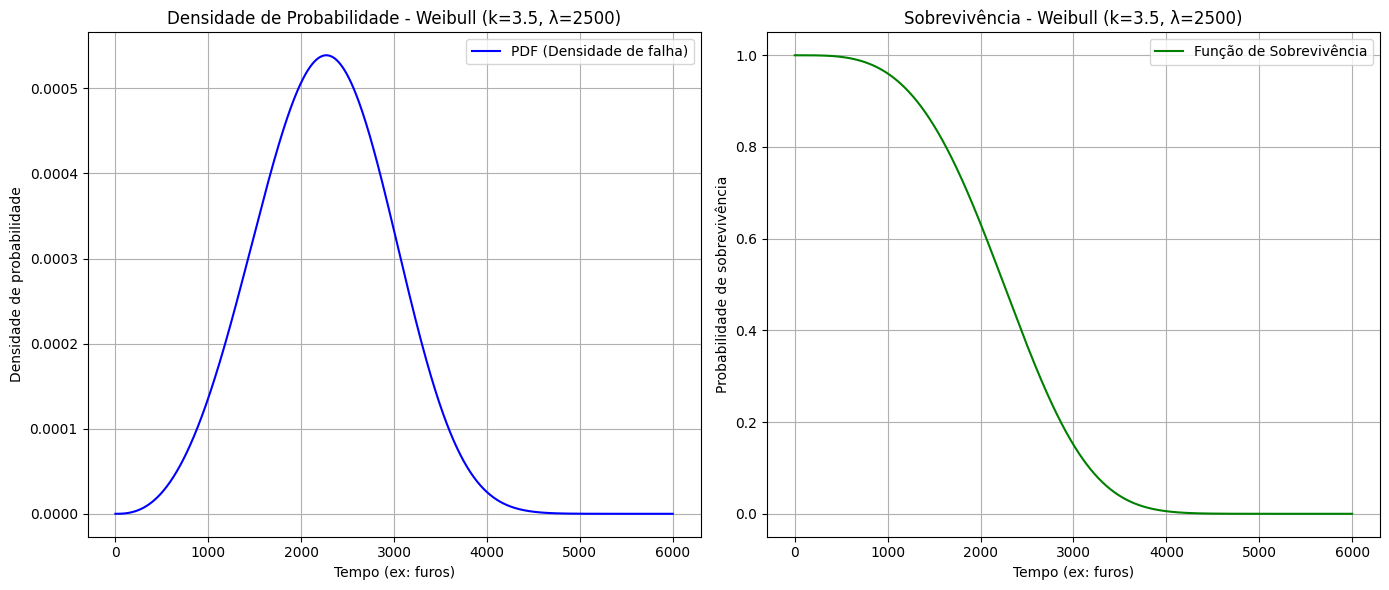

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Parâmetros da distribuição Weibull
k = 3.5
lambda_ = 2500

# Intervalo de tempo para visualização
t = np.linspace(0, 6000, 1000)

# PDF - Função de Densidade de Probabilidade
pdf = weibull_min.pdf(t, c=k, scale=lambda_)

# Função de Sobrevivência (1 - CDF)
survival = weibull_min.sf(t, c=k, scale=lambda_)

# Plotando
plt.figure(figsize=(14, 6))

# PDF
plt.subplot(1, 2, 1)
plt.plot(t, pdf, label="PDF (Densidade de falha)", color='blue')
plt.title("Densidade de Probabilidade - Weibull (k=3.5, λ=2500)")
plt.xlabel("Tempo (ex: furos)")
plt.ylabel("Densidade de probabilidade")
plt.grid(True)
plt.legend()

# Sobrevivência
plt.subplot(1, 2, 2)
plt.plot(t, survival, label="Função de Sobrevivência", color='green')
plt.title("Sobrevivência - Weibull (k=3.5, λ=2500)")
plt.xlabel("Tempo (ex: furos)")
plt.ylabel("Probabilidade de sobrevivência")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


#### Sobrepondo a curva distribuição normal com densidade weibull

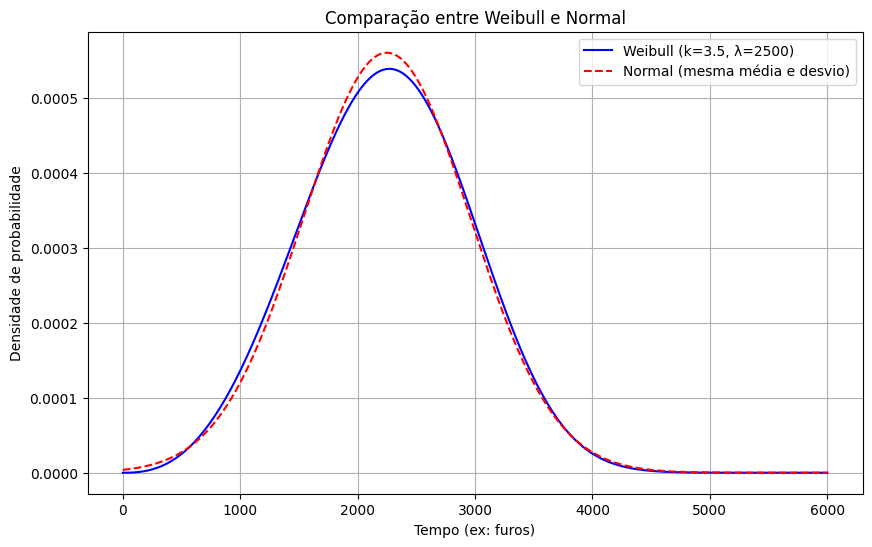

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, norm

# Parâmetros da Weibull
k = 3.5
lambda_ = 2500

# Intervalo de tempo
t = np.linspace(0, 6000, 1000)

# PDF da Weibull
pdf_weibull = weibull_min.pdf(t, c=k, scale=lambda_)

# Média e desvio padrão da Weibull
mean_weibull = weibull_min.mean(c=k, scale=lambda_)
std_weibull = weibull_min.std(c=k, scale=lambda_)

# PDF da distribuição Normal com mesma média e desvio padrão
pdf_normal = norm.pdf(t, loc=mean_weibull, scale=std_weibull)

# Plotando as duas curvas
plt.figure(figsize=(10, 6))
plt.plot(t, pdf_weibull, label="Weibull (k=3.5, λ=2500)", color='blue')
plt.plot(t, pdf_normal, label="Normal (mesma média e desvio)", color='red', linestyle='--')
plt.title("Comparação entre Weibull e Normal")
plt.xlabel("Tempo (ex: furos)")
plt.ylabel("Densidade de probabilidade")
plt.legend()
plt.grid(True)
plt.show()


### **Comparar diferentes valores de λ (lambda)** mantendo o **k fixo (por exemplo, 3.5)**, de modo que você possa visualizar **como o tempo de falha típico se desloca** com o aumento ou diminuição da escala:

---

## 📊 O que esse gráfico mostrará:

- Todas as curvas terão **o mesmo formato** (porque \( k \) é fixo).
- Mas as curvas com λ menor (ex: 500) vão “subir” mais cedo → indicando **falhas precoces**.
- Já as com λ maior (ex: 5000) vão crescer mais lentamente → indicando **vida útil mais longa**.

---


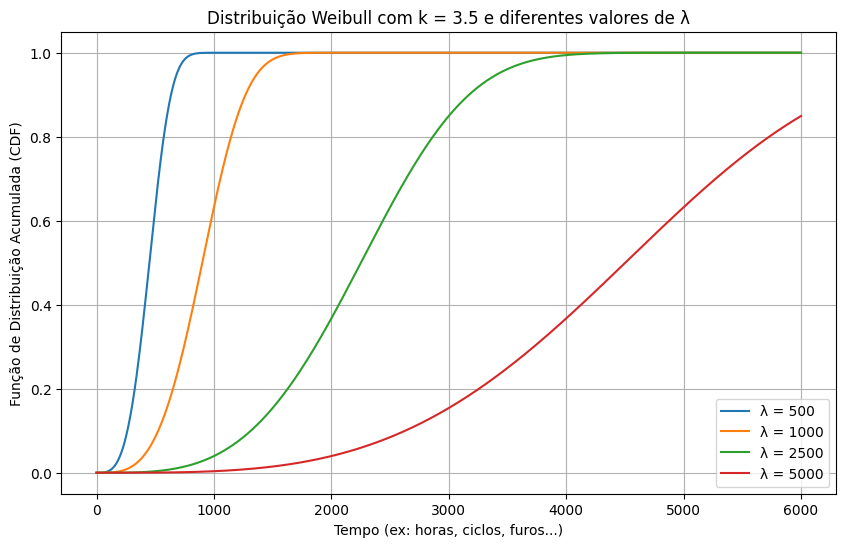

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Parâmetro de forma fixo
k = 3.5

# Diferentes valores de lambda (escala)
lambdas = [500, 1000, 2500, 5000]

# Intervalo de tempo para plotar a CDF
t = np.linspace(0, 6000, 1000)

# Plotando curvas de CDF da Weibull para diferentes lambdas
plt.figure(figsize=(10, 6))
for lambda_ in lambdas:
    cdf = weibull_min.cdf(t, c=k, scale=lambda_)
    plt.plot(t, cdf, label=f"λ = {lambda_}")

plt.title("Distribuição Weibull com k = 3.5 e diferentes valores de λ")
plt.xlabel("Tempo (ex: horas, ciclos, furos...)")
plt.ylabel("Função de Distribuição Acumulada (CDF)")
plt.legend()
plt.grid(True)
plt.show()


### Realiza a comparação com KS

1. **Gera dados simulados** com distribuição Weibull para diferentes valores de λ (mantendo $k = 3.5$);
2. **Plota as curvas CDF teóricas**;
3. **Aplica o teste de Kolmogorov-Smirnov** para verificar se os dados simulados se ajustam à distribuição Weibull teórica.

---

### ✅ O que o código faz:

- Gera dados simulando o **tempo de vida** de componentes com diferentes escalas λ.
- Plota as **curvas de falha acumulada (CDF)** para cada valor.
- Aplica o **teste KS (Kolmogorov-Smirnov)** que verifica:
  - Se os dados simulados vêm da mesma distribuição Weibull com os parâmetros fornecidos.
  - **p-valor alto (> 0.05)** → os dados **seguem bem a distribuição**.
  - **p-valor baixo (≤ 0.05)** → há **evidência contra o ajuste** à distribuição.

---

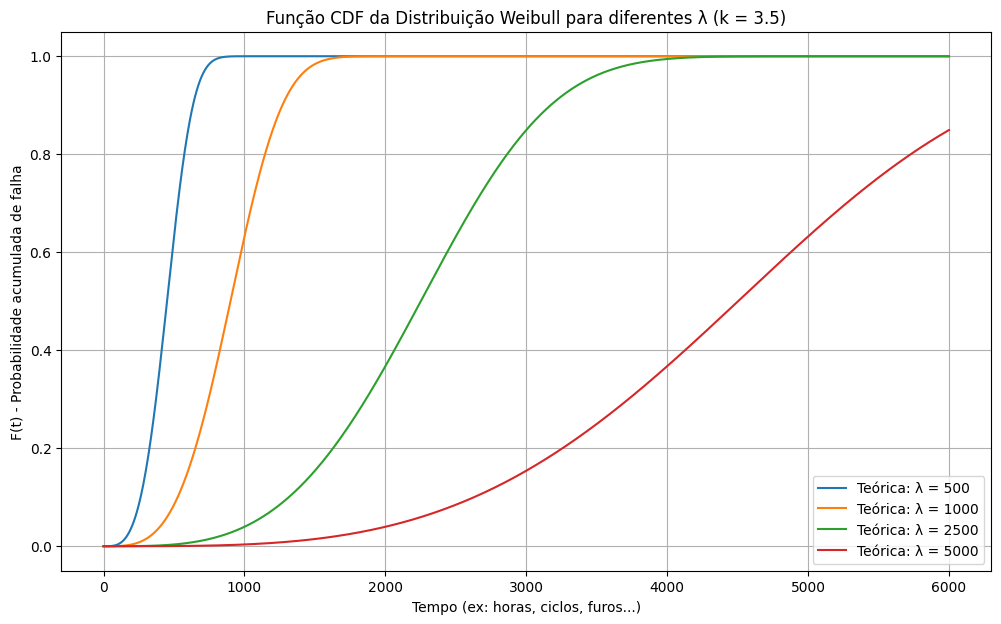

Resultados do Teste KS para dados simulados:
λ = 500 | Estatística KS = 0.0300 | p-valor = 0.3244
λ = 1000 | Estatística KS = 0.0300 | p-valor = 0.3244
λ = 2500 | Estatística KS = 0.0300 | p-valor = 0.3244
λ = 5000 | Estatística KS = 0.0300 | p-valor = 0.3244


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, kstest

# Parâmetro de forma fixo
k = 3.5

# Diferentes valores de escala (lambda)
lambdas = [500, 1000, 2500, 5000]

# Intervalo de tempo para visualização
t = np.linspace(0, 6000, 1000)

# Plotagem das CDFs teóricas
plt.figure(figsize=(12, 7))
for lambda_ in lambdas:
    cdf = weibull_min.cdf(t, c=k, scale=lambda_)
    plt.plot(t, cdf, label=f"Teórica: λ = {lambda_}")

plt.title("Função CDF da Distribuição Weibull para diferentes λ (k = 3.5)")
plt.xlabel("Tempo (ex: horas, ciclos, furos...)")
plt.ylabel("F(t) - Probabilidade acumulada de falha")
plt.legend()
plt.grid(True)
plt.show()

# Geração e verificação de dados simulados
print("Resultados do Teste KS para dados simulados:")
for lambda_ in lambdas:
    # Gera 1000 dados simulados com a distribuição Weibull
    dados_simulados = weibull_min.rvs(c=k, scale=lambda_, size=1000, random_state=42)

    # Testa se os dados seguem uma distribuição Weibull com os mesmos parâmetros
    estatistica, p_valor = kstest(dados_simulados, 'weibull_min', args=(k, 0, lambda_))

    print(f"λ = {lambda_} | Estatística KS = {estatistica:.4f} | p-valor = {p_valor:.4f}")

## Gera esse teste de KS e os gráficos de comparação entre CDF empírica e teórica

Estatística KS: 0.029956251442476683, p-valor: 0.3243752124357733


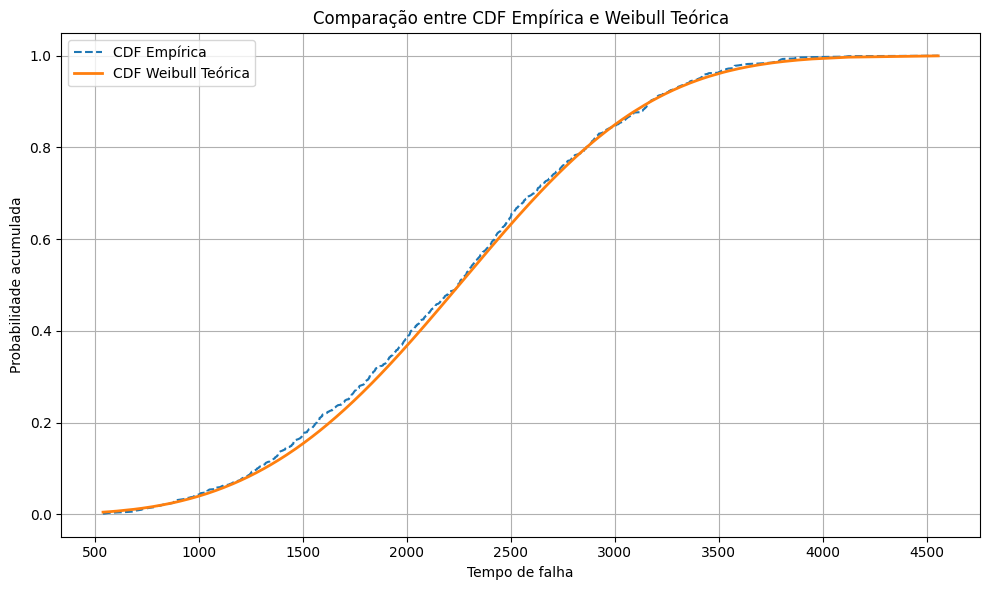

In [19]:
import numpy as np
from scipy.stats import weibull_min, kstest
import matplotlib.pyplot as plt

# Parâmetros da distribuição Weibull
k = 3.5  # parâmetro de forma
lambda_ = 2500  # parâmetro de escala

# Gerando dados simulados
np.random.seed(42)
dados = weibull_min.rvs(c=k, scale=lambda_, size=1000)

# Teste KS
estatistica, p_valor = kstest(dados, 'weibull_min', args=(k, 0, lambda_))

print(f'Estatística KS: {estatistica}, p-valor: {p_valor}')

# Plot da CDF empírica vs teórica
dados_ordenados = np.sort(dados)
cdf_empirica = np.arange(1, len(dados)+1) / len(dados)
cdf_teorica = weibull_min.cdf(dados_ordenados, c=k, scale=lambda_)

plt.figure(figsize=(10, 6))
plt.plot(dados_ordenados, cdf_empirica, label='CDF Empírica', linestyle='--')
plt.plot(dados_ordenados, cdf_teorica, label='CDF Weibull Teórica', linewidth=2)
plt.title('Comparação entre CDF Empírica e Weibull Teórica')
plt.xlabel('Tempo de falha')
plt.ylabel('Probabilidade acumulada')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
def cria_data_set(k: float, lambda_: float, size: int = 100, save_img: bool = False, nome_arquivo: str = 'dados_weibull'):
    """
      A função cria_data_set é projetada para gerar um conjunto de dados que segue a distribuição Weibull, realizar um teste de aderência para validar a distribuição e visualizar os dados gerados. Abaixo está uma explicação detalhada de cada parâmetro da função:

      k: float

      Este parâmetro representa o parâmetro de forma da distribuição Weibull. Ele controla a forma da curva da distribuição. Valores diferentes de k alteram a inclinação e o comportamento da distribuição. Por exemplo:
      k < 1: A distribuição tem uma taxa de falha decrescente.
      k = 1: A distribuição se comporta como uma exponencial.
      k > 1: A distribuição tem uma taxa de falha crescente.

      lambda_: float
      lambda < 1:	Falhas ocorrem rapidamente	Equipamento usado em ambiente hostil (ex: sensores em usinas nucleares).
      lambda = 1: Falhas ocorrem em torno de 1 unidade de tempo	Vida útil média de uma bateria recarregável de ciclo curto.
      lambda > 1: Falhas ocorrem mais tarde	Sistemas com alta durabilidade, como turbinas aeronáuticas.

      Este parâmetro é o parâmetro de escala da distribuição Weibull. Ele ajusta a escala dos dados gerados, ou seja, controla o "alongamento" da distribuição no eixo horizontal. Valores maiores de lambda_ deslocam a curva para a direita.
      size: int = 100

      Este parâmetro define o tamanho do conjunto de dados a ser gerado. O valor padrão é 100, mas você pode especificar um número maior ou menor dependendo da necessidade. No entanto, no código atual, o tamanho do conjunto de dados gerado é fixado em 100_000, ignorando o valor de size. Isso pode ser ajustado para respeitar o parâmetro.
      save_img: bool = False

      Este parâmetro indica se a visualização gerada (o histograma e a PDF teórica) deve ser salva como uma imagem. Atualmente, o código não implementa essa funcionalidade, mas o parâmetro está presente para permitir futuras extensões.
      nome_arquivo: str = 'dados_weibull'

      Este parâmetro define o nome do arquivo onde os dados gerados serão salvos. O valor padrão é 'dados_weibull'. No entanto, no código atual, o nome do arquivo é fixado como "dados_weibull.csv", ignorando o valor deste parâmetro. Isso também pode ser ajustado para respeitar o parâmetro.
      Contexto Geral
      A função gera um conjunto de dados que segue a distribuição Weibull usando a função weibull_min.rvs da biblioteca scipy.stats. Em seguida, realiza um teste de aderência Kolmogorov-Smirnov (kstest) para verificar se os dados seguem a distribuição Weibull com os parâmetros fornecidos. Por fim, exibe um histograma dos dados gerados e a PDF teórica da distribuição para validação visual.

    """
    # Gerar dados
    dados = weibull_min.rvs(k, scale=lambda_, size=size)
    np.savetxt(f"{nome_arquivo}.csv", dados, delimiter=",")

    # Teste de aderência - Kolmogorov-Smirnov
    D, p_value = kstest(dados, 'weibull_min', args=(k, 0, lambda_))
    print(f"Estatística KS: {D}, p-valor: {p_value}")

    # Se o p-valor for maior que 0.05, podemos aceitar que os dados seguem a distribuição de Weibull

    # Visualização do histograma e PDF teórica
    x = np.linspace(0, 6, 100)
    plt.hist(dados, bins=30, density=True, alpha=0.6, color='b', label="Amostra")
    plt.plot(x, weibull_min.pdf(x, k, scale=lambda_), 'r-', lw=2, label="PDF Teórica")
    plt.legend()
    plt.title("Validação da Distribuição de Weibull")

    # Salvar imagem, se necessário
    if save_img:
        plt.savefig(f"{nome_arquivo}.png")
    plt.show()

Estatística KS: 0.0004990885321626559, p-valor: 0.16552265667294064


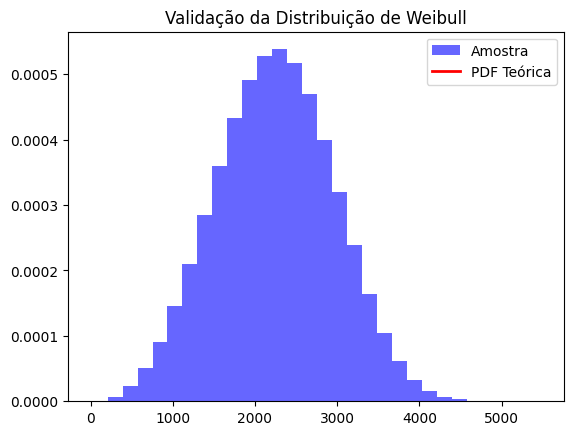

In [15]:
# Exemplo 5: Combinação de parâmetros - tamanho personalizado, salvar imagem e nome de arquivo personalizado
cria_data_set(k=3.5, lambda_=2500, size=5_000_000, save_img=True, nome_arquivo="dados_weibull_brocas")